In [2]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from pandas import DataFrame
from scipy.stats import entropy
from math import log, e
import matplotlib.pyplot as plt
import matplotlib.cm as ca
import numpy as np
import pandas as pd
import math
import timeit

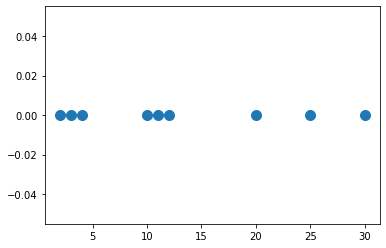

In [5]:
X = np.array([[2,0], [3,0], [4,0], [10,0], [11,0], [12,0], [20,0], [25,0], [30,0]])
plt.scatter(X[:,0], X[:,1], s=100) # x좌표랑 y좌표, 점 크기 정하기

In [6]:
# K-means 1회차
model1=KMeans(n_clusters=2, init=np.array([[3,0],[4,0]]), n_init=1, max_iter=1, random_state=1).fit(X)
c0,c1 = model1.cluster_centers_
c0,c1

(array([2.5, 0. ]), array([16.,  0.]))

In [10]:
model1.score(X), model1.labels_ # 중심점과의 거리 제곱값 합

(-372.75, array([0, 0, 0, 1, 1, 1, 1, 1, 1]))

In [13]:
def kmeans_df(model,c0,c1):
    df=pd.DataFrame(np.hstack([X, 
                               np.linalg.norm(X-c0, axis=1)[:, np.newaxis], 
                               np.linalg.norm(X-c1, axis=1)[:, np.newaxis], 
                               model.labels_[:,np.newaxis]]),
                    columns=["x좌표", "y좌표","군집거리0", "군집거리1", "군집결과"])
    return df                                                 

In [14]:
kmeans_df(model1,c0,c1)

,x좌표,y좌표,군집거리0,군집거리1,군집결과
0,2.0,0.0,0.5,14.0,0.0
1,3.0,0.0,0.5,13.0,0.0
2,4.0,0.0,1.5,12.0,0.0
3,10.0,0.0,7.5,6.0,1.0
4,11.0,0.0,8.5,5.0,1.0
5,12.0,0.0,9.5,4.0,1.0
6,20.0,0.0,17.5,4.0,1.0
7,25.0,0.0,22.5,9.0,1.0
8,30.0,0.0,27.5,14.0,1.0


In [27]:
def plot_cluster(model,c0,c1):
    plt.scatter(X[model.labels_==0,0],X[model.labels_==0,1], s=100, marker='v', c='r')
    plt.scatter(c0[0], c0[1], s=200, c='r')
    plt.scatter(X[model.labels_==1,0],X[model.labels_==1,1], s=100, marker='^', c='b')
    plt.scatter(c1[0], c1[1], s=200, c='b')
    plt.show()

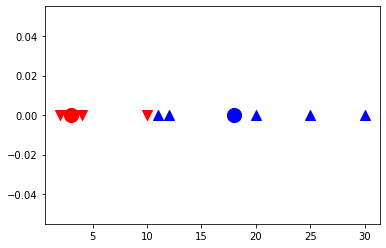

In [28]:
plot_cluster(model1,c0,c1)

In [29]:
# K-means 2회차
model1=KMeans(n_clusters=2, init=np.array([[2.5,0],[16,0]]), n_init=1, max_iter=1, random_state=1).fit(X)
c0,c1 = model1.cluster_centers_
c0,c1

(array([3., 0.]), array([18.,  0.]))

In [30]:
model1.score(X), model1.labels_

(-333.0, array([0, 0, 0, 0, 1, 1, 1, 1, 1]))

In [31]:
kmeans_df(model1,c0,c1)

,x좌표,y좌표,군집거리0,군집거리1,군집결과
0,2.0,0.0,1.0,16.0,0.0
1,3.0,0.0,0.0,15.0,0.0
2,4.0,0.0,1.0,14.0,0.0
3,10.0,0.0,7.0,8.0,0.0
4,11.0,0.0,8.0,7.0,1.0
5,12.0,0.0,9.0,6.0,1.0
6,20.0,0.0,17.0,2.0,1.0
7,25.0,0.0,22.0,7.0,1.0
8,30.0,0.0,27.0,12.0,1.0


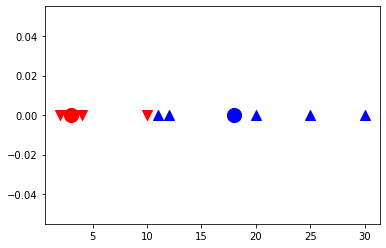

In [32]:
plot_cluster(model1,c0,c1)